
# Show version

In [2]:
import torch
from platform import python_version

print(python_version())
print(torch.__version__)
print(torch.cuda.is_available())

3.10.6
2.0.1+cu117
True


# Tensor creation (for CPU)

In [56]:
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

print(x)
print(x.shape) # tensor size
print(x.dtype) # data type
print(x.device) # where is stored
print(x.type()) # type
print(x.dim()) # tensor dimensiality
print(x.size()) # tensor size
print(x.numel()) # total number of elements in tensor

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
torch.Size([2, 4])
torch.int64
cpu
torch.LongTensor
2
torch.Size([2, 4])
8


# Tensor creation (for GPU)

In [54]:
x = torch.cuda.FloatTensor([[1, 2, 3, 4], [5, 6, 7, 8]])
print(x)
print(x.shape) # tensor size
print(x.dtype) # data type
print(x.device) # where is stored
print(x.type()) # type

tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]], device='cuda:0')
torch.Size([2, 4])
torch.float32
cuda:0
torch.cuda.FloatTensor


# Tensor type changing

In [59]:
x = torch.IntTensor([1, 2]).float()
print(x)

x = torch.IntTensor([1, 2]).to(torch.float64)
print(x)

x = torch.IntTensor([1, 2]) + 0.0
print(x)

tensor([1., 2.])
tensor([1., 2.], dtype=torch.float64)
tensor([1., 2.])


# Tensor creation

In [76]:
x = torch.empty(3, 5) # empty tensor
print(x)

x = torch.ones(3, 5) # tensor with all ones
print(x)

x = torch.full((3, 5), 3.14, dtype=torch.float) # tensor filled with 3.14
print(x)

x = torch.eye(3, 5) # tensor (matrix) with all ones on the main diagonal
print(x)

torch.manual_seed(42)
x = torch.rand(3, 5) # random tensor with elements uniformely distributed in [0, 1]
print(x)

x = torch.randn(3, 5) # random tensor with normally distributed elements
print(x)

x = torch.randint(2, 4, (3, 5)) # random tensor with integer numbers from 2 to 4 (not included)
print(x)

x = torch.arange(0, 10, 2) # np.arange analogue
print(x)

x = torch.linspace(0, 10, 3) # np.linspace analogue
print(x)

x = torch.logspace(0, 1, 3) # np.logspace analogue
print(x)

y = torch.empty_like(x) # empty tensor with shape like x
print(y)

y = torch.zeros_like(x) # tensor with all zeros and shape like x
print(y)

y = torch.ones_like(x) # tensor with all ones and shape like x
print(y)


tensor([[2.1707e-18, 7.0952e+22, 1.7748e+28, 1.8176e+31, 7.2708e+31],
        [5.0778e+31, 3.2608e-12, 1.7728e+28, 7.0367e+22, 2.1715e-18],
        [8.2265e+20, 2.1160e-07, 8.5392e-07, 2.6848e-06, 1.6517e-04]])
tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400],
        [3.1400, 3.1400, 3.1400, 3.1400, 3.1400]])
tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593, 0.3904],
        [0.6009, 0.2566, 0.7936, 0.9408, 0.1332],
        [0.9346, 0.5936, 0.8694, 0.5677, 0.7411]])
tensor([[-1.2284,  0.5294,  1.2211,  0.1511, -0.3319],
        [-0.4785, -0.2631, -0.1786, -1.1859, -0.8860],
        [-0.7150,  0.1280, -0.1603, -2.2161, -0.6858]])
tensor([[2, 3, 3, 2, 3],
        [2, 3, 2, 3, 3],
        [2, 2, 2, 2, 2]])
tensor([0, 2, 4, 6, 8])
tensor([ 0.,  5., 10.])
tensor([ 1.0000

# Tensor slicing

Like in python arrays

In [82]:
x = torch.randint(0, 10, (2, 5))
x[0], x[0,:], x[[0], :], x[:1, :], x[-2, :]

(tensor([1, 1, 0, 9, 0]),
 tensor([1, 1, 0, 9, 0]),
 tensor([[1, 1, 0, 9, 0]]),
 tensor([[1, 1, 0, 9, 0]]),
 tensor([1, 1, 0, 9, 0]))

# Tensor indexing

In [86]:
print(x[0, 0]) # it's tensor 1x1
print(x[0, 0].item()) # it's tensor's element value

tensor(1)
1


# Tensor copy

If using clone, copy remains connected with computation graph. 

If using copy_(), copy this doesn't happen.

If using detach - removes from copy any information about computation graph it's connected with.

In [92]:
a = torch.tensor([[1, 2], [3, 4]])

b = a.new_tensor(a)
b = a.clone().detach()
b = torch.empty_like(a).copy_(a)
b = torch.tensor(a)
b = a.detach().clone() # best way

/tmp/ipykernel_66371/4235412209.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than tensor.new_tensor(sourceTensor).
  b = a.new_tensor(a)
/tmp/ipykernel_66371/4235412209.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(a)


# Tensor transpose

In [95]:
xt = x.t() # transpose operation, do not copies element, uses the same memory as x, this was done to prevent excessive copy operations
print(xt)

tensor([[1, 9],
        [1, 1],
        [0, 8],
        [9, 9],
        [0, 6]])


# Tensor stacking

In [10]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

z = torch.stack((x, y)) # tensor stacking (default dim=0)
print (z, '\n', z.shape, '\n')

w = torch.stack((x, y), dim=1)
print (w, '\n', w.shape, '\n')

v = torch.stack((x, y), dim=2)
print (v, '\n', v.shape, '\n')

tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]]) 
 torch.Size([2, 2, 2]) 

tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]]) 
 torch.Size([2, 2, 2]) 

tensor([[[1, 5],
         [2, 6]],

        [[3, 7],
         [4, 8]]]) 
 torch.Size([2, 2, 2]) 



# Tensor unstacking

In [11]:
x, y = z.unbind(dim=0)
print (x, '\n', y)

tensor([[1, 2],
        [3, 4]]) 
 tensor([[5, 6],
        [7, 8]])


# Tensor concatenation

Difference from stacking - doesn't create new dimension, uses existing.

In [14]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[5, 6], [7, 8]])

z = torch.cat([x, y], axis=1)
w = torch.cat([x, y], axis=0)

print (z, '\n', z.shape, '\n')
print (w, '\n', w.shape, '\n')


tensor([[1, 2, 5, 6],
        [3, 4, 7, 8]]) 
 torch.Size([2, 4]) 

tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]]) 
 torch.Size([4, 2]) 



# Tensor: create new dimension

In [16]:
x = torch.tensor([[1, 2], [3, 4]])

# create new dimension and set it's position
print (x.unsqueeze(dim=0).shape, x.unsqueeze(dim=1).shape, x.unsqueeze(dim=2).shape)
print (x[None, :, :].shape, x[:, None, :].shape, x[:, :, None].shape)

torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])
torch.Size([1, 2, 2]) torch.Size([2, 1, 2]) torch.Size([2, 2, 1])


# Tensor: delete new dimension

In [18]:
# delete axis with dimensiality 1
torch.empty(3, 1, 2, 1).squeeze().shape

torch.Size([3, 2])

# Tensors are contiguous

In [26]:
import torch
H = torch.rand((10000, 10000))

In [27]:
# sum of rows is faster
%%time
s = torch.sum(H, axis=1)

CPU times: user 76.9 ms, sys: 0 ns, total: 76.9 ms
Wall time: 19.3 ms


In [28]:
# sum of columns is slower
%%time
s = torch.sum(H, axis=0)

CPU times: user 115 ms, sys: 0 ns, total: 115 ms
Wall time: 29.6 ms


This is happening because in Pytorch 2 or more dimensional tensors by default are stored in memory by rows (to access the next row, we just move to the next memory address). 

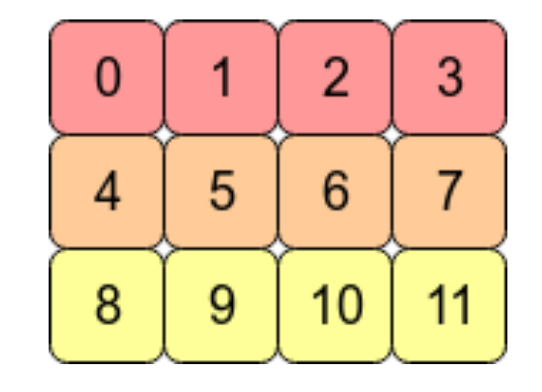 

This way of storing in memory is called **contiguous**.

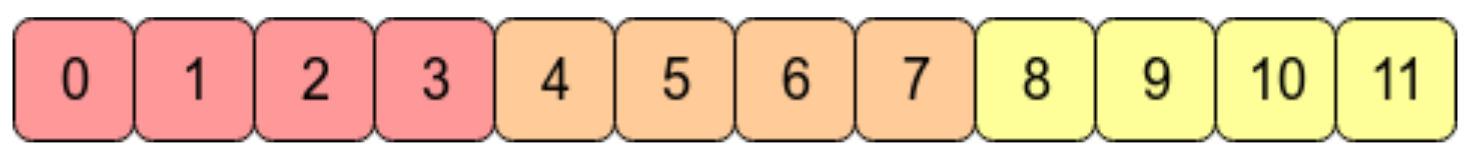

That why row sum is faster. More info here:

https://stackoverflow.com/questions/26998223/what-is-the-difference-between-contiguous-and-non-contiguous-arrays/26999092%2326999092

# Changing of contiguousness

Tensor transpose operation can change contiguousness

In [31]:
x = torch.randn(3, 2)
print (x.is_contiguous()) # contiguous

y = torch.transpose(x, 0, 1)
print (y.is_contiguous()) # not contiguous

x[0, 0] = 42 # but x and y share the same memory
print(y[0, 0]) # 42

True
False
tensor(42.)


# Size of tensors

Tensor representation can be changed by view, actually view operation changes size but actually data don't move. Pytorch just remembers that tensor has different size now. View works only with contiguous tensors, in opposite case error message will appear (to prevent this we can preliminary make tensor contiguous with .contiguous() operation).

In [231]:
x = torch.arange(4*10*2).view(4, 10, 2)

# View
print('contiguous', x.is_contiguous())
print('pull to 1D', x.view(-1))

contiguous True
pull to 1D tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79])


In [232]:
y = x.permute(2, 0, 1) # permute dimensialities in tensor; 2, 0, 1 is a numbers of axis 

# Reshape
print('contiguous', y.is_contiguous())
# print('pull to 1D', y.view(-1)) # error

contiguous False


Reshape works always. It tries to make *view* operation, but if it's failed, it makes copy of data. So, when using reshape, data can be copied (data copy decreases performance).

In [48]:
print('reshape', y.reshape(-1))
print('make contiguous and reshape', y.contiguous().view(-1))

reshape tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27,
        29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,
        65, 67, 69, 71, 73, 75, 77, 79])
make contiguous and reshape tensor([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
        36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70,
        72, 74, 76, 78,  1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27,
        29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63,
        65, 67, 69, 71, 73, 75, 77, 79])


# Tensor: format

In Pytorch tensors are stored in format [channel, height, width], in other systems [height, width, channel] is usually used.

In [52]:
x = torch.arange(8)

# tensor doensn't change because the was no assignment x = x.view()
x.view(4, 2), x.view(2, -1)

(tensor([[0, 1],
         [2, 3],
         [4, 5],
         [6, 7]]),
 tensor([[0, 1, 2, 3],
         [4, 5, 6, 7]]))

In [61]:
x = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

# how data is stored
print (x, '\n', x.storage())

# how we should change index to move to the next element in row and in column
print (x.stride(), x.t().stride())

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]]) 
  1
 2
 3
 4
 5
 6
 7
 8
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 8]
(4, 1) (1, 4)


# Transpose tensors

In [ ]:
import torch

z = torch.rand(1, 2, 3, 4)
z = z.permute(0, 3, 1, 2) # NxHxWxC -> NxCxHxW
z.shape

# another ways of transpose
x.transpose(0, 1), x.t(), x.t_() # operation_ is an inplace operation, so .t() in not inplace operation and .t_() is inplace transpose

# vectorization
x.flatten() # another option is .view(-1)

# Trick with tensort transposition:
# if you want to e.g. subtract each tensor element from each tensor element you can
# subtract from tensor transposed tensor:
x = torch.tensor([1, 2, 3, 4]).reshape(-1, 1)
x - x.t()

tensor([[ 0, -1, -2, -3],
        [ 1,  0, -1, -2],
        [ 2,  1,  0, -1],
        [ 3,  2,  1,  0]])

# Tensor operations

Similar to numpy, most operations are executed elementwise. Linear algebra operations are supported. Most of them are taken from Basic Linear Algebra Subprograms (BLAS) and Linear Algebra Package (LAPACK).

In [67]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

print(x + y, '\n', x.add(y))

# inplace operation
x.add_(y)
x

# other operations are similar to operations is python


tensor([[3, 4],
        [5, 6]]) 
 tensor([[3, 4],
        [5, 6]])


tensor([[3, 4],
        [5, 6]])

# Matrix operations

torch.matmul - simple matrix multiplication

torch.mm - simple matrix multiplication but without broadcasting

torch.bmm - matrix multiplication with batch support: (b×n×m)(b×m×p)=b×n×p

In [72]:
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])

# matrix multiplication
x @ y, x.mm(y), x.matmul(y), torch.matmul(x, y)

(tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]),
 tensor([[ 6,  6],
         [14, 14]]))

# Tensor broadcasting

Broadcasting is an operation that makes tensors to be equal sizes (without making copies of the data).

Two tensors are “broadcastable” if the following rules hold:

    - Each tensor has at least one dimension.

    - When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.


Broadcasting example #1:

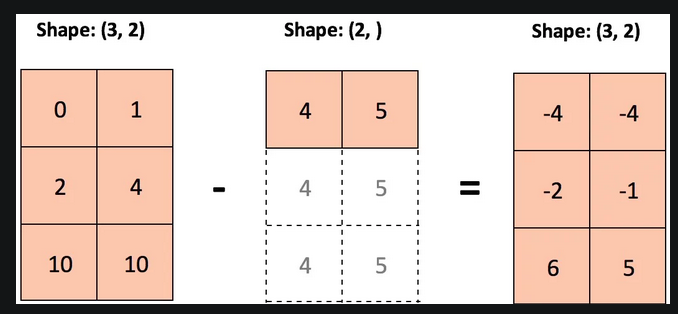

In [118]:
x = torch.tensor([[0, 1], [2, 4], [10, 10]])
y = torch.tensor([4, 5])
print (x, x.shape)
print (y, y.shape)
z = x - y
print (z, z.shape)

tensor([[ 0,  1],
        [ 2,  4],
        [10, 10]]) torch.Size([3, 2])
tensor([4, 5]) torch.Size([2])
tensor([[-4, -4],
        [-2, -1],
        [ 6,  5]]) torch.Size([3, 2])


Broadcasting example #2:


In [113]:
x = torch.tensor([[1, 2]])
y = torch.tensor([[0], [3]])
print (x, x.shape)
print (y, y.shape)
z = x + y
print (z, z.shape)

tensor([[1, 2]]) torch.Size([1, 2])
tensor([[0],
        [3]]) torch.Size([2, 1])
tensor([[1, 2],
        [4, 5]]) torch.Size([2, 2])


# Scalar multiplication

In [83]:
v = torch.tensor([1, 2])
print(torch.dot(v, v), v.dot(v))

# to make scalar multiplication of multidimensional tensors they should be flattened
x = torch.tensor([[1, 2], [3, 4]])
y = torch.tensor([[2, 2], [2, 2]])
print(torch.dot(x.view(-1), y.view(-1)))

# multiplication by vector
torch.mv(x, v), x.mv(v)

tensor(5) tensor(5)
tensor(20)


(tensor([ 5, 11]), tensor([ 5, 11]))

# Logarithm operation

In [88]:
x = torch.tensor([[1, 2], [3, 4]])
x.log()

tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]])

# Sum opeartion

In [91]:
x = torch.tensor([[1, 2], [3, 4]])

print(torch.sum(x), x.sum(), x.sum().item(), x.sum(axis=0), x.sum(axis=1))

# keepdim - preserve dimensions of tensor
x.sum(axis=1, keepdim=True) 

tensor(10) tensor(10) 10 tensor([4, 6]) tensor([3, 7])


tensor([[3],
        [7]])

# Max operation

In [93]:
# axis argument makes max function to return two tensors: values and indicies
torch.max(x), x.max(), x.max().item(), x.max(axis=0), x.max(axis=1)

(tensor(4),
 tensor(4),
 4,
 torch.return_types.max(
 values=tensor([3, 4]),
 indices=tensor([1, 1])),
 torch.return_types.max(
 values=tensor([2, 4]),
 indices=tensor([1, 1])))

# Tensor statistics

In [112]:
x = torch.tensor([2,1,2,3,0,4,3])
print(x.topk(k=2)) # top k values
print(x.kthvalue(k=2)) # top kth value
print(torch.std_mean(x * 1.0)) # std and mean
print(torch.var_mean(x * 1.0)) # variance and mean

torch.return_types.topk(
values=tensor([4, 3]),
indices=tensor([5, 3]))
torch.return_types.kthvalue(
values=tensor(1),
indices=tensor(1))
(tensor(1.3452), tensor(2.1429))
(tensor(1.8095), tensor(2.1429))


# Tensor translation to numpy

It's important for tensor to be sent to CPU and detached from computation graph before translation to numpy

In [121]:
# that's correct order of translation to numpy
y = x.cpu().detach().numpy()
print(y)
# but even after after translation to numpy x and y are actually the same
x[0, 0] = 10
print(y)

[[10  1]
 [ 2  4]
 [10 10]]
[[10  1]
 [ 2  4]
 [10 10]]


# Tensor translation from numpy

In [123]:
import numpy as np

torch.from_numpy(np.ones((2, 2)))
torch.tensor([[1., 1.],
[1., 1.]], dtype=torch.float64)

tensor([[1., 1.],
        [1., 1.]], dtype=torch.float64)

# Tensor save and load

In [126]:
# save
torch.save(x, 'x-file')

# load
x2 = torch.load("x-file")
x2



tensor([[10,  1],
        [ 2,  4],
        [10, 10]])

# Save and load as dict

In [128]:
x = torch.tensor([[1, 2]])
y = torch.tensor([[0], [3]])

mydict = {'x': x, 'y': y}
torch.save(mydict, 'mydict')
mydict2 = torch.load('mydict')
mydict2

{'x': tensor([[1, 2]]),
 'y': tensor([[0],
         [3]])}

# Tensors on CPU and GPU/TPU

Tensors and models can be on CPU or GPU, but tensors/models on CPU can't see/interact with tensors/models on GPU => the all must be located in one device. Moving of data to GPU is expensive operation, that's why it's performed not for every image but for the whole batch.

These notations are equal to mark execution device as GPU:

In [ ]:
device="cuda"
device=torch.device("cuda")
device="cuda:0"
device=torch.device("cuda:0")

### Send tensor to CPU/GPU

In [139]:
x = x.cuda() # send tensor x to GPU
x = x.cpu() # send tensor x to CPU
print(x.is_cuda) # check if tensor x is attached to GPU
z = z.to("cuda", torch.double) # send tensor z to GPU and translate it to type that you need
print(z.is_cuda)

False
True


### The most popular command to find the device that is suitable for tensor/model processing

In [142]:
# find available device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# send tensor to this device
y.to(device)

tensor([[0],
        [3]], device='cuda:0')

### GPU info

In [160]:
print('Using device:', device)
print()
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print(f'Total memory: {round(torch.cuda.mem_get_info(0)[1]/1024**3, 1)} GB')
    print('Memory Usage:')
    print(f'Allocated: {round(torch.cuda.memory_allocated(0)/1024**3, 1)} GB')
    print(f'Cached: {round(torch.cuda.memory_reserved(0)/1024**3, 1)} GB')

Using device: cuda:0

NVIDIA GeForce GTX 1070
Total memory: 7.9 GB
Memory Usage:
Allocated: 0.0 GB
Cached: 0.0 GB


### GPU memory free

In [162]:
import gc
gc.collect() # Python thing

with torch.no_grad(): # free GPU memory
    torch.cuda.empty_cache()

# GPU advantage in tensor operations

Create a huge tensor

In [174]:
x = torch.randn(5000, 5000)

CPU

In [175]:
%%time

_ = torch.matmul(x, x)

CPU times: user 2.28 s, sys: 44.1 ms, total: 2.33 s
Wall time: 586 ms


CPU to GPU

In [178]:
%%time

x = x.to("cuda:0")

CPU times: user 29 µs, sys: 0 ns, total: 29 µs
Wall time: 32.9 µs


GPU

In [177]:
%%time

_ = torch.matmul(x, x)

CPU times: user 290 µs, sys: 8.14 ms, total: 8.43 ms
Wall time: 7.69 ms


# Pytorch fix random seed

In [180]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available(): # для GPU отдельный seed
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seed(42)

# some operation on GPU can be stochastic, if we want our results to be reproducable, we should make them deterministic
torch.backends.cudnn.determinstic = True
torch.backends.cudnn.benchmark = False

# Pytorch AutoGrad

In [194]:
x = torch.linspace(-2, 2, 101, dtype=torch.float32, requires_grad=True) # another option to make tensor x differentiable is inplace function x.requires_grad_()

y = torch.sin(x) * (torch.sin(x) ** 2 + torch.cos(x) **2) # forward pass
y.sum().backward() # convert to number and make backward pass (gradient can be taken only from single number)
g = x.grad # find derivative for every point of x
g

tensor([-0.4161, -0.3795, -0.3421, -0.3043, -0.2660, -0.2272, -0.1881, -0.1487,
        -0.1090, -0.0691, -0.0292,  0.0108,  0.0508,  0.0907,  0.1304,  0.1700,
         0.2092,  0.2482,  0.2867,  0.3248,  0.3624,  0.3993,  0.4357,  0.4713,
         0.5062,  0.5403,  0.5735,  0.6058,  0.6372,  0.6675,  0.6967,  0.7248,
         0.7518,  0.7776,  0.8021,  0.8253,  0.8473,  0.8678,  0.8870,  0.9048,
         0.9211,  0.9359,  0.9492,  0.9611,  0.9713,  0.9801,  0.9872,  0.9928,
         0.9968,  0.9992,  1.0000,  0.9992,  0.9968,  0.9928,  0.9872,  0.9801,
         0.9713,  0.9611,  0.9492,  0.9359,  0.9211,  0.9048,  0.8870,  0.8678,
         0.8473,  0.8253,  0.8021,  0.7776,  0.7518,  0.7248,  0.6967,  0.6675,
         0.6372,  0.6058,  0.5735,  0.5403,  0.5062,  0.4713,  0.4357,  0.3993,
         0.3624,  0.3248,  0.2867,  0.2482,  0.2092,  0.1700,  0.1304,  0.0907,
         0.0508,  0.0108, -0.0292, -0.0691, -0.1090, -0.1487, -0.1881, -0.2272,
        -0.2660, -0.3043, -0.3421, -0.37

Actually sin(x) * (sin(x) ** 2 + cos(x) **2) is a sin(x), so gradient of y should equal to cos(x), and yes, it is.

In [198]:
torch.cos(x)

tensor([-0.4161, -0.3795, -0.3421, -0.3043, -0.2660, -0.2272, -0.1881, -0.1487,
        -0.1090, -0.0691, -0.0292,  0.0108,  0.0508,  0.0907,  0.1304,  0.1700,
         0.2092,  0.2482,  0.2867,  0.3248,  0.3624,  0.3993,  0.4357,  0.4713,
         0.5062,  0.5403,  0.5735,  0.6058,  0.6372,  0.6675,  0.6967,  0.7248,
         0.7518,  0.7776,  0.8021,  0.8253,  0.8473,  0.8678,  0.8870,  0.9048,
         0.9211,  0.9359,  0.9492,  0.9611,  0.9713,  0.9801,  0.9872,  0.9928,
         0.9968,  0.9992,  1.0000,  0.9992,  0.9968,  0.9928,  0.9872,  0.9801,
         0.9713,  0.9611,  0.9492,  0.9359,  0.9211,  0.9048,  0.8870,  0.8678,
         0.8473,  0.8253,  0.8021,  0.7776,  0.7518,  0.7248,  0.6967,  0.6675,
         0.6372,  0.6058,  0.5735,  0.5403,  0.5062,  0.4713,  0.4357,  0.3993,
         0.3624,  0.3248,  0.2867,  0.2482,  0.2092,  0.1700,  0.1304,  0.0907,
         0.0508,  0.0108, -0.0292, -0.0691, -0.1090, -0.1487, -0.1881, -0.2272,
        -0.2660, -0.3043, -0.3421, -0.37

### AutoGrad for multiple tensors

Computational graph of function below:

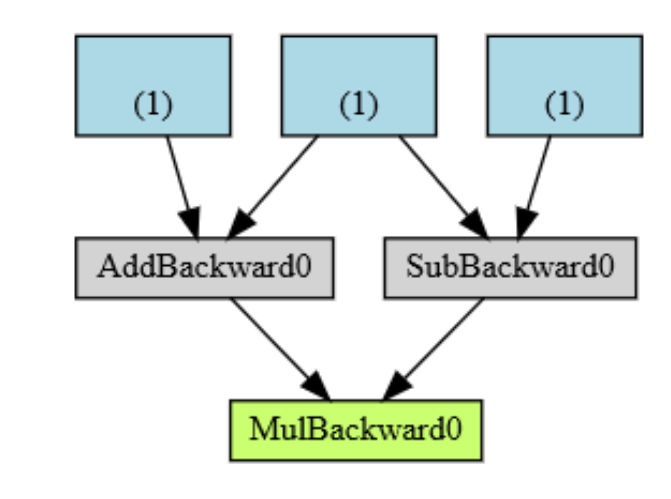

In [204]:
x = torch.tensor([1.], requires_grad=True)
y = torch.tensor([2.], requires_grad=True)
z = torch.tensor([3.], requires_grad=True)

f = (x + y) * (y - z)

f.backward()
x.grad, y.grad, z.grad

(tensor([-1.]), tensor([2.]), tensor([-3.]))

### What if don't need to calculate gradients?

In [206]:
f = (x + y) * (y - z)
v = f.detach()
print (f.requires_grad, v.requires_grad)

# or when you need just forward pass and don't need to calculate gradients

with torch.no_grad():
    f = (x + y) * (y - z)
print (f.requires_grad)

True False
False


### What if we take gradient for function, one of elements of which doesn't require gradient caculation?

In [210]:
x = torch.Tensor([1, 2, 3])
w = torch.tensor([1., 1, 1], requires_grad=True)

z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n') # x doesn't require gradient calculation -> will return None

None
tensor([1., 2., 3.])


If we repeat gradient calculation one more time, new gradient value will be added to the previous one:

In [211]:
z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n') # gradient will

None
tensor([2., 4., 6.])


So we need to make gradient zero

In [212]:
w.grad.data.zero_()

z = w @ x
z.backward()
print(x.grad, w.grad, sep='\n') # gradient will

None
tensor([1., 2., 3.])


# AutoGrad with detach

No gradient after detaching

In [215]:
x = torch.tensor([2.], requires_grad=True)
print(x)
print(x.detach())

tensor([2.], requires_grad=True)
tensor([2.])


Without y.detach_() gradient of function z should be 12 but with y.detach_() it's 4. It's because y isn't considered after detaching, and actually we calculate (2 * 2 * x)' = 4

In [216]:
x = torch.tensor([2.], requires_grad=True)
y = x * x
y.detach_() 
z = x * y
# а тут не сработает
z.backward()
print(x.grad)

tensor([4.])


# Dynamic computation graph in cycle

In [223]:
x = torch.tensor([[1, 2], [3, 4]], requires_grad=True, dtype=torch.float32)
x0 = x # set x0 as head of computation graph

for _ in range(2):
    x = x * x

z = x.mean() # sum(x) / 4
z.backward()

print(x, '\n', x.grad) # because x now is inner vertex of computation graph, so gradient won't be shown
print(x0, '\n', x0.grad) # gradient will be here, this is a head of computation graph for now

tensor([[  1.,  16.],
        [ 81., 256.]], grad_fn=<MulBackward0>) 
 None
tensor([[1., 2.],
        [3., 4.]], requires_grad=True) 
 tensor([[ 1.,  8.],
        [27., 64.]])


/tmp/ipykernel_4931/2146655783.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:486.)
  print(x, '\n', x.grad) # because x now is inner vertex of computation graph, so gradient won't be shown


# Masked gradient calculation

In [226]:
x = torch.tensor([[1., 2, 3, 4]], requires_grad=True)

z = x ** 2 / 2
loss = z.sum(dim=1)

# use mask to calculate gradient for the second element
z.backward(torch.FloatTensor([[0, 1, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

tensor([[0., 2., 0., 0.]])


tensor([[0., 0., 0., 0.]])

# Two consequtive backward passes through graph

In [229]:
a = torch.rand(1, 4, requires_grad=True)
b = a**2
c = b*2
d = c.mean()
e = c.sum()

# if we do this
# d.backward() # ok
# but with that
# e.backward() # error, because we try to do backward twice for the same graph

# so if we want to do backward twice or more (e.g. for NN with two or more heads) for the same graph, we should use this
d.backward(retain_graph=True) #
e.backward(retain_graph=True) #

# Operations with NNs and data

TensorDataset - fucntion for dataset representation

DataLoader - function that helps to load data by batches

Example

In [247]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x = torch.from_numpy(np.vstack([np.arange(10, dtype='float32'), np.ones(10, dtype='float32')]).T)
y = torch.from_numpy(np.arange(10, dtype='float32')[:, None] ** 2)

train_ds = TensorDataset(x, y) # create tensor dataset
train_dl = DataLoader(train_ds, batch_size=4, shuffle=True) # load data by batches with shuffling

for xb, yb in train_dl:
    print(xb)
    print(yb)
    print('\n')

tensor([[3., 1.],
        [0., 1.],
        [5., 1.],
        [4., 1.]])
tensor([[ 9.],
        [ 0.],
        [25.],
        [16.]])


tensor([[7., 1.],
        [6., 1.],
        [9., 1.],
        [2., 1.]])
tensor([[49.],
        [36.],
        [81.],
        [ 4.]])


tensor([[8., 1.],
        [1., 1.]])
tensor([[64.],
        [ 1.]])




# train_test split

In [248]:
ds = TensorDataset(x, y)
train_size = int(0.8 * len(ds))
test_size = len(ds) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(ds,[train_size, test_size])

# How to send lists to model

In [251]:
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader

my_x = np.array([np.array([[1.0,2],[3,4]]),np.array([[5.,6],[7,8]])]) # a list of numpy arrays
my_y = np.array([np.array([4.]), np.array([2.])]) # another list of numpy arrays (targets)

tensor_x = torch.Tensor(my_x) # transform to torch tensor
tensor_y = torch.Tensor(my_y)

my_dataset = TensorDataset(tensor_x, tensor_y) # create your datset
my_dataloader = DataLoader(my_dataset) # create your dataloader

# Load data with augmentations

- num_workers sets number of processes that load data. It's better to experiment with its value, it can increase performance.
- if use GPU, pin_memory should be True
- if need train dataset, set train=True, for test set train=False

In [ ]:
from torchvision import datasets

train_loader = torch.utils.data.DataLoader(datasets.MNIST('../data', train=True, download=True, 
                                                          transform=transforms.Compose([transforms.ColorJitter(brightness=(0.6, 1), contrast=(0.8, 1)), 
                                                                                        transforms.RandomRotation((-15, 15)), 
                                                                                        transforms.ToTensor(), # transform to tensor
                                                                                        transforms.Normalize((0.1307,), (0.3081,)) # noramlize
                                                                                        ])), batch_size=64, shuffle=True, num_workers=8, pin_memory=True)

# Can write your own transformation

In [ ]:
class Noise():
    '''Adds gaussian noise to a tensor.'''

    def __init__(self, mean, stddev):
        self.mean = mean
        self.stddev = stddev

    def __call__(self, tensor):
        noise = torch.zeros_like(tensor).normal_(self.mean, self.stddev)
        return tensor.add_(noise)

    def __repr__(self):
        repr = f"{self.__class__.__name__}(mean={self.mean}, sttdev={self.stddev})"
        return repr

# Can write your own dataset

In [ ]:
class CustomTextDataset(Dataset):
    '''Simple Dataset initializes with X and y vectors'''

    def __init__(self,X,y=None):
        self.data = list(zip(X,y))
        # Sort by length of first element in tuple
        self.data = sorted(self.data, key=lambda x: len(x[0]))

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# NN modules

## Simple linear layer

In [2]:
from torch import nn

model = nn.Linear(in_features=2, out_features=1, bias=True)

print(model.weight)
print(model.bias)

list(model.parameters())

Parameter containing:
tensor([[-0.4414, -0.7028]], requires_grad=True)
Parameter containing:
tensor([-0.4403], requires_grad=True)


[Parameter containing:
 tensor([[-0.4414, -0.7028]], requires_grad=True),
 Parameter containing:
 tensor([-0.4403], requires_grad=True)]

## How to combine modules?

Use nn.Sequential

In [17]:
net = nn.Sequential(nn.Linear(10, 5), 
                    nn.ReLU(), 
                    nn.Linear(5, 2))

print(net)

# another option is use nn.Sequential and add names to layers for convinience
import torch
from collections import OrderedDict

net1 = nn.Sequential(OrderedDict([('hidden_linear', nn.Linear(10, 5)), 
                                  ('hidden_activation', nn.ReLU()), 
                                  ('output', nn.Linear(5, 2))]))

print(net1)

# when call net, forward pass is automatically made
X = torch.rand(3, 10)
net(X)

Sequential(
  (0): Linear(in_features=10, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=2, bias=True)
)
Sequential(
  (hidden_linear): Linear(in_features=10, out_features=5, bias=True)
  (hidden_activation): ReLU()
  (output): Linear(in_features=5, out_features=2, bias=True)
)


tensor([[ 0.1688, -0.2381],
        [ 0.2047, -0.4102],
        [ 0.1931, -0.3198]], grad_fn=<AddmmBackward0>)

# Simplest NN

This net is equivalent to network above.

In [12]:
import torch.nn.functional as F

class MLP(nn.Module):
    def __init__(self):
        super().__init__() # super(MLP, self).__init__()
        self.hidden = nn.Linear(10, 5) # Hidden layer
        self.out = nn.Linear(5, 2) # Output layer

    def forward(self, X):
        # how to process data and get answer
        return self.out(F.relu(self.hidden(X)))
    
net2 = MLP()
net2

MLP(
  (hidden): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=2, bias=True)
)

Another way to make the same NN (the most convinient IMHO)

In [10]:
class NNN(torch.nn.Module):
    def __init__(self):
        super(NNN, self).__init__()
        self.layers = torch.nn.Sequential()
        self.layers.add_module('lin1', torch.nn.Linear(10, 5))
        self.layers.add_module('relu1', torch.nn.ReLU())
        self.layers.add_module('lin2', torch.nn.Linear(5, 2))
    
    def forward(self, input):
        return self.layers(input)
    
net3 = NNN()
net3

NNN(
  (layers): Sequential(
    (lin1): Linear(in_features=10, out_features=5, bias=True)
    (relu1): ReLU()
    (lin2): Linear(in_features=5, out_features=2, bias=True)
  )
)

NN state dict: all weights and biases of NN

In [18]:
net.state_dict() # you need to save this if you want to save the state of your network

OrderedDict([('0.weight',
              tensor([[-0.1911,  0.2196,  0.2522,  0.3102, -0.2442, -0.1451,  0.2961, -0.2840,
                       -0.2914, -0.0485],
                      [ 0.2618,  0.2414,  0.2594,  0.2020, -0.1978,  0.0225,  0.2891, -0.2244,
                       -0.1278, -0.2556],
                      [-0.0482, -0.0607, -0.0505,  0.2761,  0.2491,  0.1520,  0.2944, -0.1268,
                       -0.0918,  0.2378],
                      [ 0.3070,  0.0535,  0.2642,  0.1721, -0.0155,  0.1743, -0.2981,  0.2521,
                        0.0455,  0.1207],
                      [-0.1263,  0.2192, -0.1623, -0.1952, -0.1158,  0.2561, -0.1339, -0.0005,
                        0.2026, -0.1038]])),
             ('0.bias', tensor([-0.0799, -0.2861, -0.0133,  0.1203,  0.3039])),
             ('2.weight',
              tensor([[-0.1334, -0.1093,  0.1141,  0.2170,  0.4033],
                      [-0.2159, -0.2462,  0.3076, -0.2202, -0.0919]])),
             ('2.bias', tensor([-0.1220

Get NN layer and its weight and bias by its name

In [44]:
net3.layers.lin1, net3.layers.lin1.weight.data, net3.layers.lin1.bias.data

(Linear(in_features=10, out_features=5, bias=True),
 tensor([[-0.2968,  0.0313, -0.0596,  0.0408, -0.2986,  0.3072, -0.0311, -0.0753,
          -0.1666,  0.0546],
         [ 0.2505,  0.1762, -0.0494,  0.2005,  0.1934, -0.1292,  0.2075,  0.0311,
          -0.2695,  0.2217],
         [ 0.0786,  0.1478,  0.2825, -0.2137,  0.2967, -0.0429,  0.0232,  0.0991,
           0.0544, -0.1287],
         [ 0.0130,  0.0638,  0.2388,  0.1399, -0.1401,  0.2362, -0.0849, -0.2627,
           0.2974, -0.2348],
         [ 0.2864,  0.0301, -0.0498, -0.2368, -0.2499, -0.2764, -0.0450,  0.0960,
           0.1253, -0.1881]]),
 tensor([ 0.1848,  0.0709,  0.0012, -0.2681,  0.0787]))

Get NN layer gradient (None because net wasn't trained)

In [33]:
net3.layers.lin1.bias.grad, net3.layers.lin2.bias.grad

(None, None)

# Count number of NN parameters

In [45]:
numel_list = [p.numel() for p in net3.parameters() if p.requires_grad == True]
sum(numel_list), numel_list

(67, [50, 5, 10, 2])

# NN parameters sharing

Use the same module in multiple places of NN

In [46]:
shared = nn.Linear(8, 8)

class NNN(torch.nn.Module):
    def __init__(self):
        super(NNN, self).__init__()
        self.layers = torch.nn.Sequential()
        self.layers.add_module('lin1', torch.nn.Linear(4, 8))
        self.layers.add_module('relu1', torch.nn.ReLU())
        self.layers.add_module('shared1', shared)
        self.layers.add_module('relu2', torch.nn.ReLU())
        self.layers.add_module('shared2', shared)
        self.layers.add_module('relu3', torch.nn.ReLU())
        self.layers.add_module('lin2', torch.nn.Linear(8, 1))
    
    def forward(self, input):
        return self.layers(input)
    
net4 = NNN()
net4

NNN(
  (layers): Sequential(
    (lin1): Linear(in_features=4, out_features=8, bias=True)
    (relu1): ReLU()
    (shared1): Linear(in_features=8, out_features=8, bias=True)
    (relu2): ReLU()
    (shared2): Linear(in_features=8, out_features=8, bias=True)
    (relu3): ReLU()
    (lin2): Linear(in_features=8, out_features=1, bias=True)
  )
)

# Creating of you own modules

Inherit module from nn.Module and define methods __ init __ and forward

In [47]:
# layer without hyperparameters that centers data during forward pass 

class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, X):
        return X - X.mean()

# Explicit declaring of NN weights and forward method 

In [48]:
class MyNetworkWithParams(nn.Module):
    def __init__(self,input_size, hidden_size, output_size):
        super(MyNetworkWithParams,self).__init__()
        # it's important to declare weights and biases as nn.Parameter, net won't be able to train without it
        self.layer1_weights = nn.Parameter(torch.randn(input_size, hidden_size))
        self.layer1_bias = nn.Parameter(torch.randn(hidden_size))
        self.layer2_weights = nn.Parameter(torch.randn(hidden_size, output_size))
        self.layer2_bias = nn.Parameter(torch.randn(output_size))

    def forward(self,x):
        h1 = torch.matmul(x,self.layer1_weights) + self.layer1_bias
        h1_act = torch.max(h1, torch.zeros(h1.size())) # ReLU
        output = torch.matmul(h1_act,self.layer2_weights) + self.layer2_bias
        return output

# List of layers

In [49]:
# set list of layers for compactness and convinience
class MyNet(nn.Module):
    def __init__(self,n_hidden_layers):
        super(MyNet, self).__init__()
        self.n_hidden_layers = n_hidden_layers
        self.final_layer = nn.Linear(128, 10)
        self.act = nn.ReLU()
        self.hidden = []
        for i in range(n_hidden_layers):
            self.hidden.append(nn.Linear(128, 128))
        self.hidden = nn.ModuleList(self.hidden) # it's important to declare list as nn.ModuleList

    def forward(self,x):
        h = x
        for i in range(self.n_hidden_layers):
            h = self.hidden[i](h)
            h = self.act(h)
        out = self.final_layer(h)
        return out

# Initialization

Can be applied for every module separately

In [51]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, mean=0, std=0.01)
        nn.init.zeros_(m.bias)


def init_normal_v2(m):
    if isinstance(m, nn.Linear):
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

net.apply(init_normal)
print(net[0].weight.data[0], net[0].bias.data[0])

net.apply(init_normal_v2)
print(net[0].weight.data[0], net[0].bias.data[0])

# if you wamt to copy weights of some tensor to weights of your layer as initialization - use function below
def init_custom(m):
    if type(m) == nn.Linear:
        rw = torch.randn(m.weight.data.size())
        m.weight.data.copy_(rw)

tensor([ 0.0143, -0.0036, -0.0283, -0.0010, -0.0108,  0.0001,  0.0034, -0.0160,
        -0.0043,  0.0152]) tensor(0.)
tensor([-0.0964, -0.3883, -0.0827, -0.1141,  0.4970, -0.2750,  0.4307, -0.0721,
         0.2211, -0.2588]) tensor(0.0100)


# How train net

In [ ]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        # set gradient to zero to prevent it accumulation
        optimizer.zero_grad(set_to_none=True) # ~ model.zero_grad()
        # move data and target to device
        data = data.to(device)
        target = target.to(device)
        # get output of the model
        outputs = model(data)
        # calculate loss
        loss = criterion(outputs, target)
        running_loss += loss.item()
        # calculate gradient
        loss.backward() 
        # update weights according to gradient value
        optimizer.step()
    # return epoch loss
    running_loss /= len(train_loader)
    return running_loss

# Loss functions

In [29]:
# CrossEntropyLoss = Softmax + CrossEntropy

loss = nn.CrossEntropyLoss()
a = torch.randn(3, 5, requires_grad=True) # 3 objects with 5 probabilities for each class
y = torch.empty(3, dtype=torch.long).random_(5) # 3 targets with number of class
print (a, y, loss(a, y))

tensor([[ 0.6684,  0.3911,  0.7770, -0.6086,  0.6816],
        [ 0.2903,  0.1203, -0.6085, -0.3346, -0.0127],
        [ 0.5905,  0.8817, -1.8756, -1.2629,  0.2401]], requires_grad=True) tensor([4, 0, 1]) tensor(1.1904, grad_fn=<NllLossBackward0>)


# Custom loss function

In [32]:
class CustomNLLLoss(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self, x, y):
        # x should be output from LogSoftmax Layer
        log_prob = -1.0 * x
        # Get log_prob based on y class_index as loss=-mean(ylogp)
        loss = log_prob.gather(1, y.unsqueeze(1))
        loss = loss.mean()
        return loss

criterion = CustomNLLLoss() # nn.NLLLoss()
CustomNLLLossClass = criterion(a, y)
CustomNLLLossClass

tensor(-0.6179, grad_fn=<MeanBackward0>)

# Custom learning rate for each layer

In [35]:
from torch import optim
optim.SGD([
        {'params': model.features.parameters(), 'lr': 1e-1},
        {'params': model.classifier.parameters(), 'lr': 1e-3}
        ], lr=1e-2, momentum=0.9)

# Optimization Scheduler

In [ ]:
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau, CosineAnnealingLR

# if scheduler depends on train/test loss - need to send parameters to optimizer when it's created
optimizer = optim.SGD(net.parameters(), lr)

# reduce LR on factor value when train/test loss decreases
scheduler_1 = ReduceLROnPlateau(optimizer, factor=0.1, patience=1, threshold=0.1)

# reduce LR every step_size steps by multiplying on gamma value
scheduler_2 = StepLR(optimizer, step_size=1, gamma=0.1)

# ....
# we can use multiple schedulers on every step
if not is_train:
    scheduler_1.step(running_loss / (i + 1))
    scheduler_2.step()

# Custom optimizer

In [ ]:
class OptimizerTemplate:
    def __init__(self, params, lr):
        self.params = list(params)
        self.lr = lr

    def zero_grad(self):
    ## Set gradients of all parameters to zero
        for p in self.params:
            if p.grad is not None:
                p.grad.detach_() # For second-order optimizers important
                p.grad.zero_()

    @torch.no_grad()
    def step(self):
    ## Apply update step to all parameters
        for p in self.params:
            if p.grad is None: # We skip parameters without any gradients
                continue
        self.update_param(p)

    def update_param(self, p):
        # To be implemented in optimizer-specific classes
        raise NotImplementedError
    
class SGD(OptimizerTemplate):
    def __init__(self, params, lr):
        super().__init__(params, lr)

    def update_param(self, p):
        p_update = -self.lr * p.grad
        p.add_(p_update) # In-place => saves memory + doesn't create c. graph

# Save and load model

In [ ]:
torch.save(model, "/tmp/model.pth")
model = torch.load("/tmp/model.pth")

torch.save(model.state_dict(), "/tmp/model.pth") # save only params
model = MLP()

model.load_state_dict(torch.load("/tmp/model.pth")) # save only params
model.to(device) # send to device
model.eval() # switch model to evaluation (inference) mode

# save weights + epoch + optimizer
state = {
        'epoch': epoch + 1,
        'state_dict': net.state_dict(),
        'optimizer' : optimizer.state_dict()
        }
torch.save(state, './my_checkpoint.pth')

# Custom activation function

In [ ]:
@torch.jit.script # this decorator creates a TorchScript program that can be run independently from Python and lets export the function / model
                  # to a production environment where Python programs may be disadvantageous for performance and multi-threading reasons
def fused_gelu(x):
    return x * 0.5 * (1.0 + torch.erf(x / 1.41421))

class MySigmoid (nn.Module):
    def __init__(self):
        super().__init__()
        self.name = self.__class__.__name__
        self.config = {"name": self.name}

    def forward(self, x):
        return 1 / (1 + torch.exp(-x))

## NN validation

In [ ]:
model.eval() # switch to evaluation mode, it changes forward() behaivour - influences on DO, BN

with torch.no_grad(): # context manager where gradients don't calculate, even for tensors with requires_grad=True
    train, y_train = train_dataset.tensors
    # train, y_train = train.to(device), y_train.to(device)
    train_preds = model(train)
    train_loss = loss_fn(train_preds, y_train).item()

# Pytorch: models

In [ ]:
from torchvision import models

transfer_model = models.resnet34(pretrained=True)
transfer_model.eval()

# layers freezing
for name, param in model_cnn.named_parameters():
    if ("bn" not in name): # BN better not to freeze!
        param.requires_grad = False

# Transfer learning

In [ ]:
from torchvision import models

resnet18 = models.resnet18(pretrained=True)
    
for parameter in resnet18.parameters(): # freeze layers
    parameter.requires_grad = False

# replace FC layer
resnet18.fc = nn.Linear(512, 10)

# NN visualization (summary)

In [ ]:
from torchvision import models
from torchsummary import summary

vgg = models.vgg16()
summary(vgg, (3, 224, 224))